
### Q1: How is the bike share business in San Francisco performing over time?

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import bigquery
sns.set_palette("deep")


In [ ]:
#import data
bqclient = bigquery.Client()

query_string = """
SELECT 
    trip_id, 
    CAST(start_date AS DATE) AS start_date, 
    FIRST_VALUE(start_station_name) OVER(PARTITION BY start_station_id ORDER BY start_date DESC) AS start_station_name,
    CAST(end_date AS DATE) AS end_date, 
    FIRST_VALUE(end_station_name) OVER(PARTITION BY end_station_id ORDER BY start_date DESC) AS end_station_name,
    TIMESTAMP_DIFF(end_date, start_date, second) AS duration,
    EXTRACT(YEAR from start_date) AS year,
    EXTRACT(TIME from start_date) AS time,
    EXTRACT(DAYOFWEEK from start_date) AS weekday,
    bike_number, 
    subscriber_type, 
    member_birth_year, 
    member_gender 
FROM 
    `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` 
"""
# sf = (
#     bqclient.query(query_string)
#     .result()
#     .to_dataframe(
#         create_bqstorage_client=True,
#     )
# )

In [100]:
sf = pd.read_csv('sf.csv')
sf.head()

,trip_id,start_date,start_station_name,end_station_name,duration,year,day,hour,weekday,bike_number,subscriber_type,member_birth_year,member_gender
0,29332018043022031900,2018-04-30,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,393,2018,04-30,22,2,2933,Subscriber,1988.0,Female
1,3502018043020445900,2018-04-30,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,489,2018,04-30,20,2,350,Subscriber,1988.0,Female
2,11142018043019445400,2018-04-30,The Embarcadero at Sansome St,The Embarcadero at Sansome St,436,2018,04-30,19,2,1114,Customer,1990.0,Male
3,21932018043019381600,2018-04-30,5th St at Brannan St,The Embarcadero at Sansome St,1029,2018,04-30,19,2,2193,Subscriber,1990.0,Male
4,24152018043019133000,2018-04-30,Berry St at 4th St,The Embarcadero at Sansome St,1114,2018,04-30,19,2,2415,Subscriber,1973.0,Male


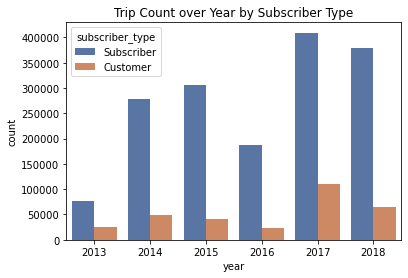

In [60]:
ax = sns.countplot(x="year", hue="subscriber_type", data=sf).set_title('Trip Count by Subscriber Type each Year')

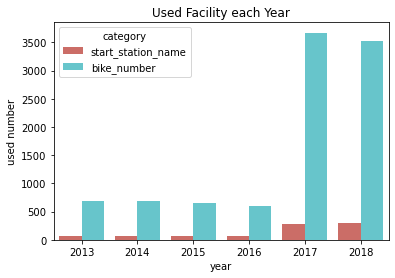

In [142]:
year_uni_df = sf.groupby(['year']).nunique().reset_index()
bike_station_df = year_uni_df[['year', 'start_station_name', 'bike_number']].melt('year', var_name='category',  value_name='used number')
ax = sns.barplot(x="year", y="used number", hue='category', data=bike_station_df, palette='hls').set_title('Used Facility each Year')

In [1]:
# uusage over day by suscriber & none over day 
# trips taken by subscriber & customer, duration, by year over date
# heatmap of station
# dock prb

### Q2: What are your observations when you compare bike share users in San Francisco with bike share users in New York?

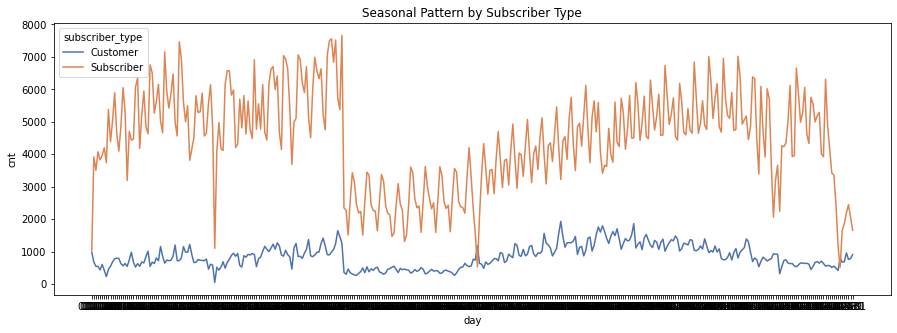

In [121]:
plt.figure(figsize=(15,5))
weekday_df = sf.groupby(['day', 'subscriber_type']).size().reset_index(name='cnt')
ax = sns.lineplot(data=weekday_df, x="day", y="cnt", hue="subscriber_type" ).set_title('Seasonal Pattern by Subscriber Type')

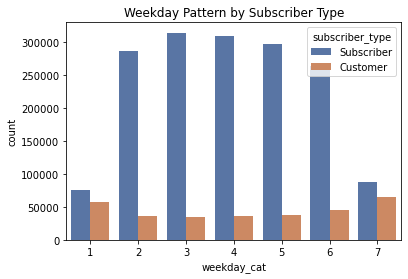

In [123]:
sf['weekday_cat']=sf['weekday'].astype('category')
ax = sns.countplot(data=sf, x="weekday_cat", hue="subscriber_type" ).set_title('Weekday Pattern by Subscriber Type')

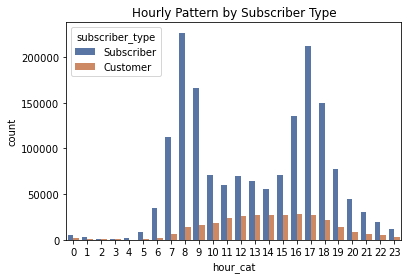

In [122]:
sf['hour_cat']=sf['hour'].astype('category')
ax = sns.countplot(data=sf, x="hour_cat", hue="subscriber_type" ).set_title('Hourly Pattern by Subscriber Type')


In [ ]:
# gender & age demo average over day
# comparing temperature effect 
# comparing subscriber & customer weekday & day pattern